In [2]:
# Voxel Designer - Beam Elements

In [1]:
using Plots
using LinearAlgebra
using NLopt
import JSON
using SparseArrays
using StaticArrays, BenchmarkTools
using Statistics

In [68]:
include("./FEM_frame.jl")
include("./compliant_mechanisms_frame.jl")

simulateAndExport (generic function with 1 method)

In [4]:
function complianMechanismOptimization(fileName,scale,dmax,maxeval=500,threshold=0.25,exageration=100.0)
    
    setup = getSetup(fileName)
    E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
    problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
    
    ##todo change based on hinge
    free=map(node ->map(deg -> !deg, node["restrained_degrees_of_freedom"]), setup["nodes"])
    free=reshape(collect(Iterators.flatten(free)),size(Ls[1]))
    
    nel=length(setup["edges"])
    X=ones(nel)
    K,F,d,stress,dcomp,g=FEM_frame(problem,X);
    display("Original Domain:")
    display(plotFrame3D(problem,X,1.0))
    display("Optimization Details:")
    X=optimizeCompliantMechanism(problem,Ls,free,dmax,500)
    display("Area Optimization:")
    display(plotFrame3D(problem,copy(X),1/scale/10000.0))
#     display(plotFrame3D(problem,copy(X),1/scale,threshold))
    display("Final Design:")
    display(plotFrameDeformed3D(problem,copy(X),scale,threshold,exageration))
    K,F,d,stress,dcomp,g=FEM_frame(problem,X);
    simulateAndExport(setup,X,dcomp,"result_frame_$(fileName)",threshold)

    return X
    
end

complianMechanismOptimization (generic function with 4 methods)

"Original Domain:"

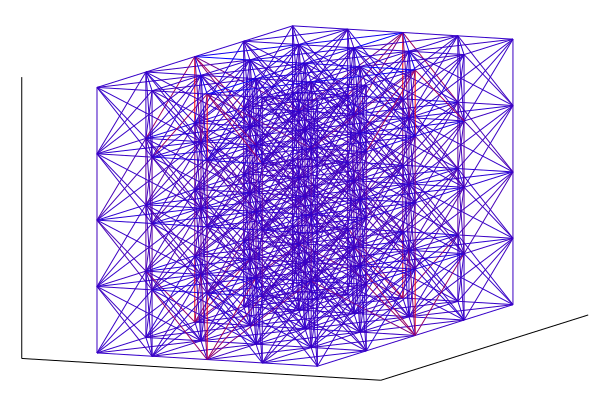

"Optimization Details:"

4

(60.346672108295365, [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001  …  0.001, 0.001, 0.001, 0.018451517643461923, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], :XTOL_REACHED)

"got 60.346672108295365 after 80 iterations (returned XTOL_REACHED)"

"Area Optimization:"

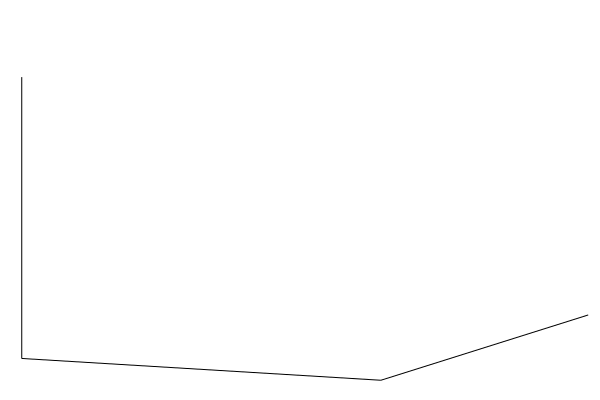

"Final Design:"

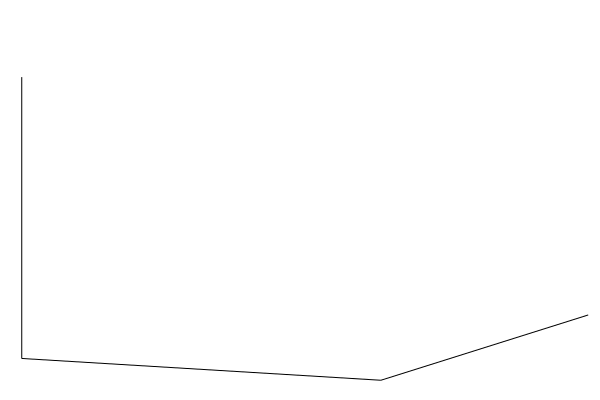


 57.147370 seconds (158.49 M allocations: 66.991 GiB, 11.58% gc time)


In [22]:
fileName="compliant.json"
scale=0.1
dmax=-100
maxeval=500
threshold=0.01
exageration=0.01
X=complianMechanismOptimization(fileName,scale,dmax,maxeval,threshold,exageration);

"Original Domain:"

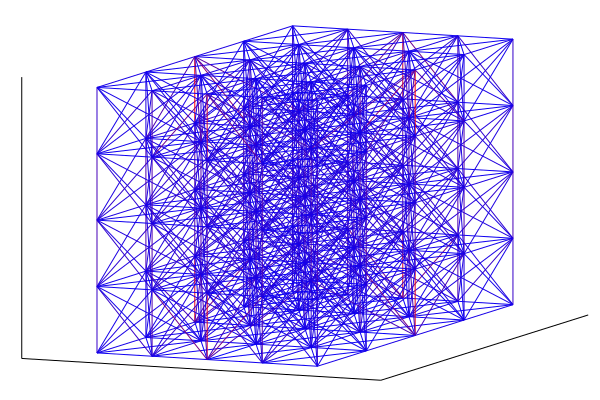

"Optimization Details:"

4

(22.549970488047688, [0.5052111550085225, 0.5037324393026748, 0.5019883031497294, 0.5000630821603811, 0.5015028900398699, 0.5009495726451687, 0.5006297286310547, 0.5034017275978409, 0.5006789804098193, 0.5004368792463688  …  0.500217956996375, 0.49996433940464785, 0.5001073802531497, 0.5054518466937393, 0.49843952909350936, 0.4996637425709479, 0.5000749461378003, 0.5027919888261622, 0.5001047807953316, 0.5006818316036645], :XTOL_REACHED)

"got 22.549970488047688 after 39 iterations (returned XTOL_REACHED)"

"Area Optimization:"

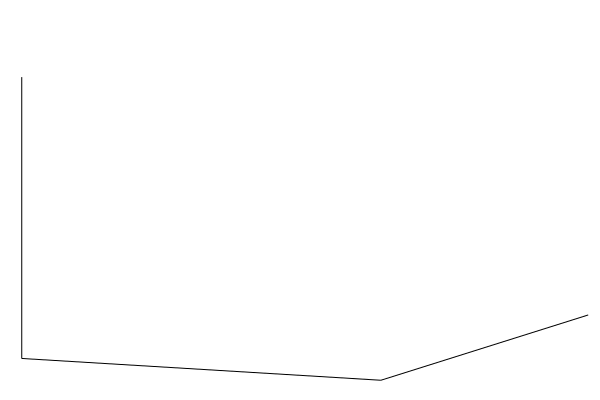

"Final Design:"

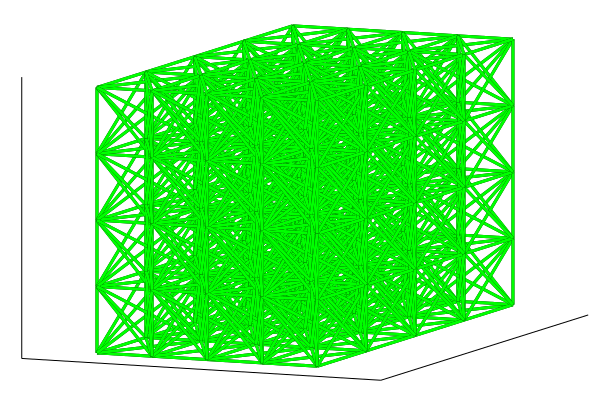


 26.028404 seconds (77.43 M allocations: 32.847 GiB, 12.59% gc time)


In [81]:
fileName="auxetic.json"
scale=10.0
dmax=-100
maxeval=500
threshold=0.002
exageration=0.01
X=complianMechanismOptimization(fileName,scale,dmax,maxeval,threshold,exageration);

"Original Domain:"

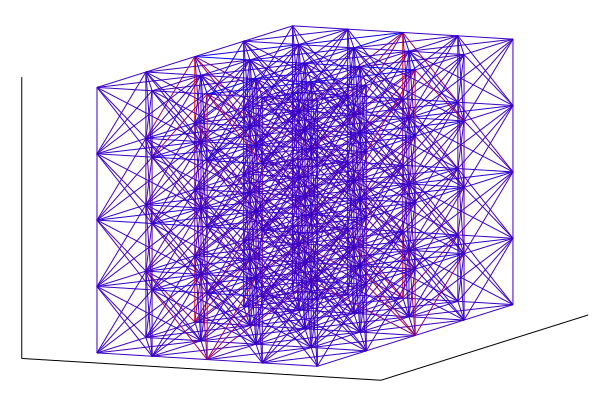

"Optimization Details:"

4


(116.67015256572549, [0.001, 0.001, 0.0010030282359435715, 0.42482148904496014, 0.0010094952335293617, 0.0010000117435280372, 0.0010001878983882887, 0.00101203851074148, 0.0010394546421426329, 0.0010000465414488021  …  0.0010000039148251442, 0.001001674386234358, 0.14850049691482783, 0.0012616927508544403, 0.0010251113741910516, 0.0011074610285613084, 0.4510220551425578, 0.001038713801640027, 0.0010007692215324984, 0.0010132795546389092], :XTOL_REACHED)

"got 116.67015256572549 after 129 iterations (returned XTOL_REACHED)"

"Area Optimization:"

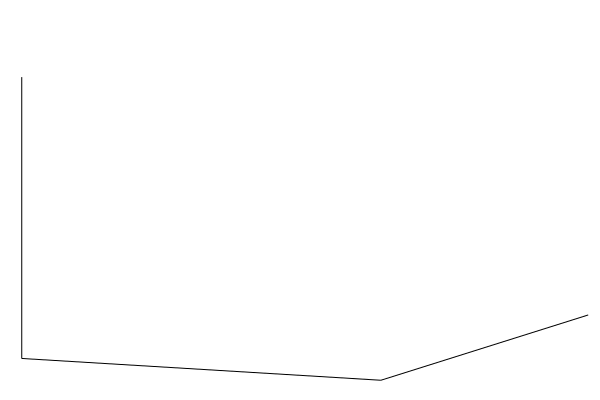

"Final Design:"

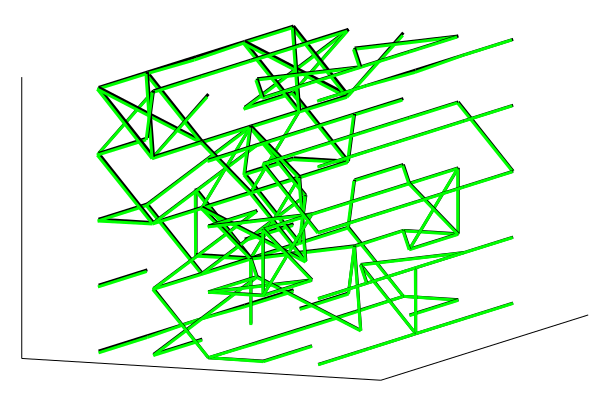

 94.428333 seconds (256.58 M allocations: 108.670 GiB, 11.31% gc time)


In [69]:
fileName="shear.json"
scale=0.1
dmax=-100
maxeval=500
threshold=0.01
exageration=0.01
X=complianMechanismOptimization(fileName,scale,dmax,maxeval,threshold,exageration);

In [76]:
X

1036-element Array{Float64,1}:
 0.037659823916407584
 0.001
 0.001
 0.30702417005096916
 0.001
 0.001
 0.001
 0.1606810918249423
 0.27247441445323883
 0.04715266083031215
 0.31134437890240907
 0.1428581461920195
 0.2495309171416643
 ⋮
 0.23202276904843414
 0.04406610313328718
 0.27328165016938066
 0.001
 0.23202276904843236
 0.550463431683663
 0.06190965512563794
 0.001
 0.29165961934466544
 0.0034045557938901035
 0.07397688149498577
 0.001

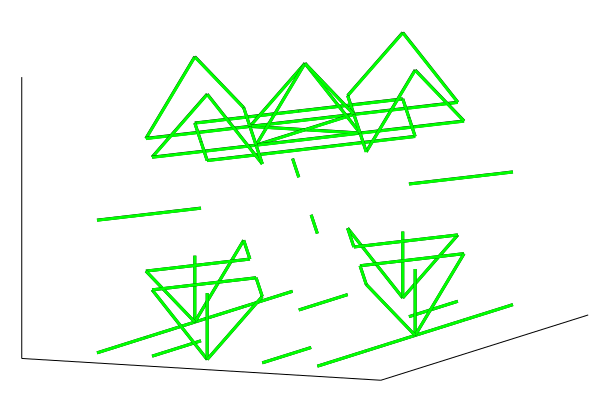

41031

In [80]:

threshold=0.3

setup = getSetup(fileName)
E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te,Ls=getDataFromSetup3D(setup,scale);
problem=E,f,g,idb,ien,ndf,nel,nen,nnp,nsd,xn,len,Ke,Te;
display(plotFrameDeformed3D(problem,copy(X),scale,threshold,exageration))
K,F,d,stress,dcomp,g=FEM_frame(problem,X);
simulateAndExport(setup,X,dcomp,"result_frame_$(fileName)",threshold)